# Chapter 11: Time Series

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Anything that is observed or measured at many points in time forms a time series.

## 11.1 Date and Time Data Types and Tools

Python's standard library includes data types for date and time data, as well as calendar functionality.

`datetime`, `time`, and `calendar` modules are the main places to start.

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2021, 2, 12, 15, 3, 34, 238698)

In [4]:
now.year, now.month, now.day

(2021, 2, 12)

`datetime` stores both date and time down to the microsecond.

`timedelta` represents the temporal difference between two `datetime` objects.

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta

In [9]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 11.1.1 Converting Between String and Datetime

You can format `datetime` objects and pandas `Timestamp` objects as strings using `str` or `strftime` method.

In [11]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

You can convert many of the same format code strings to dates using `datetime.strptime`.

In [13]:
value = '2011-02-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 2, 3, 0, 0)

In [14]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

`datetime.strptime` is a good way to parse a date with a known format. Use `parser.parse` from `dateutil` package to parse the format spec for you.

In [15]:
from dateutil.parser import parse

In [16]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [18]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

panda's `to_datetime` method parses many different kinds of date representations.

In [19]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [20]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [21]:
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True])

> Note: `dateutil.parser` is a useful but imperfect tool. It will recognize some strings as dates that you might prefer that it didn't. `'42'` => year `2042`.

## 11.2 Time Series Basics

In [23]:
from datetime import datetime

In [24]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
          datetime(2011, 1, 7), datetime(2011, 1, 8),
          datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.120934
2011-01-05    0.770675
2011-01-07   -0.674510
2011-01-08   -0.936056
2011-01-10   -1.206683
2011-01-12    2.390235
dtype: float64

In [25]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts + ts[::2]

2011-01-02   -0.241867
2011-01-05         NaN
2011-01-07   -1.349020
2011-01-08         NaN
2011-01-10   -2.413367
2011-01-12         NaN
dtype: float64

> Recall: `ts[::2]` selects every second element in `ts`.

In [27]:
ts.index.dtype

dtype('<M8[ns]')

In [28]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 11.2.1 Indexing, Selection, Subsetting

Time series behaves like any other `pandas.Series` when indexing and label selection.

In [29]:
stamp = ts.index[2]
ts[stamp]

-0.6745100322639864

In [30]:
ts['1/10/2011']

-1.206683401578003

In [31]:
ts['20110110']

-1.206683401578003

In [32]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.364313
2000-01-02   -1.475993
2000-01-03   -1.237182
2000-01-04    0.091727
2000-01-05    0.076819
                ...   
2002-09-22    1.715622
2002-09-23    0.971582
2002-09-24   -0.801239
2002-09-25    0.481198
2002-09-26    0.794848
Freq: D, Length: 1000, dtype: float64

In [33]:
longer_ts['2001']

2001-01-01    0.376707
2001-01-02   -0.679763
2001-01-03   -0.332346
2001-01-04   -0.308281
2001-01-05   -1.416105
                ...   
2001-12-27    0.229699
2001-12-28   -0.687022
2001-12-29   -0.716013
2001-12-30    0.333937
2001-12-31    0.274439
Freq: D, Length: 365, dtype: float64

The string `'2001'` is interpreted as a year and selects that time period. This also works if you specify the month.

In [34]:
longer_ts['2001-05']

2001-05-01   -0.400726
2001-05-02    0.113036
2001-05-03    0.561665
2001-05-04   -0.583516
2001-05-05    1.079957
2001-05-06    1.900057
2001-05-07    1.351708
2001-05-08    0.123475
2001-05-09   -0.919854
2001-05-10   -0.561684
2001-05-11    1.130950
2001-05-12   -0.090663
2001-05-13    0.808662
2001-05-14   -0.505367
2001-05-15   -1.464369
2001-05-16    1.076546
2001-05-17   -0.128375
2001-05-18    1.018297
2001-05-19    0.331258
2001-05-20    0.151207
2001-05-21    0.678560
2001-05-22    0.410335
2001-05-23    2.096160
2001-05-24   -0.424394
2001-05-25    0.486355
2001-05-26   -0.799982
2001-05-27   -1.322972
2001-05-28    0.536410
2001-05-29    1.164011
2001-05-30    0.157871
2001-05-31   -0.469779
Freq: D, dtype: float64

In [35]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.674510
2011-01-08   -0.936056
2011-01-10   -1.206683
2011-01-12    2.390235
dtype: float64

In [36]:
ts

2011-01-02   -0.120934
2011-01-05    0.770675
2011-01-07   -0.674510
2011-01-08   -0.936056
2011-01-10   -1.206683
2011-01-12    2.390235
dtype: float64

In [37]:
ts['1/6/2011': '1/11/2011']

2011-01-07   -0.674510
2011-01-08   -0.936056
2011-01-10   -1.206683
dtype: float64

> Note: Slicing in this manner produces views on the source time series like slicing NumPy arrays. This means that no data is copied and modifications on the slice will be reflected in the original data.

`truncate` also slices a Series between two dates.

In [38]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.120934
2011-01-05    0.770675
2011-01-07   -0.674510
2011-01-08   -0.936056
dtype: float64

In [39]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.805368,0.128020,0.826887,-0.041340
2001-05-09,-0.656442,-1.553799,-0.446586,1.393205
2001-05-16,0.008952,0.577406,-1.095107,-1.117455
2001-05-23,0.819017,0.096350,-0.010493,0.413088
2001-05-30,0.549137,0.469043,-0.313034,1.775464


### 11.2.2 Time Series with Duplicate Indices

In [40]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

We can check whether the index is unique with `is_unique` property.

In [41]:
dup_ts.index.is_unique

False

In [42]:
dup_ts['1/3/2000'] # not duplicated

4

In [43]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

To aggregate the date with non-unique timestamps, use `groupby` and pass `level=0`.

In [44]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [45]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

Generic time series are assume to be irregular (no fixed frequency). But often times it's better to have a fixed frequency (daily, hourly, etc) even if it introduces missing values.

`resample` can convert a sample time series to be fixed daily frequency.

In [46]:
ts

2011-01-02   -0.120934
2011-01-05    0.770675
2011-01-07   -0.674510
2011-01-08   -0.936056
2011-01-10   -1.206683
2011-01-12    2.390235
dtype: float64

In [47]:
resampler = ts.resample('D') # 'D' is interpreted as daily frequency

### 11.3.1 Generating Date Ranges

`pandas.date_range` is responsible for generating a `DatetimeIndex` with an indicated length according to a particular frequency.

In [48]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [49]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

If you wanted a date index containing the last business day of each month, pass the `'BM'` frequency (business end of month) and only dates falling on or inside the date interval will be included.

In [51]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [52]:
pd.date_range('2012-05-02 12:56:31', periods=5) # Preserves the time

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Use `normalize` option to set a set of timestamps to midnight.

In [53]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2 Frequencies and Date Offsets

Frequencies are composed of a *base frequency* and a multiplier. For each base frequency, there is an object defined generally referred to as a *date offset*.

For example, hourly frequency can be represented with `Hour` class.

In [54]:
from pandas.tseries.offsets import Hour, Minute

In [55]:
hour = Hour()
hour

<Hour>

In [56]:
four_hours = Hour(4)
four_hours

<4 * Hours>

For most cases, use a string alias like `'H'` or `'4H'`.

In [57]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [58]:
Hour(2) + Minute(30)

<150 * Minutes>

In [59]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

*Anchored* offsets - Frequencies that are not even spaced, such as `'M'` (calendar month end) and `'BM'` (last business/weekday of month).

#### Week of month dates

`WOM` "week of month" enables you to get dates like the third Friday of each month.

In [60]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 11.3.3 Shifting (Leading and Lagging) Data

"Shifting" refers to moving data backward or forward through time. Use `shift` for doing naive shifts, leaving the index unmodified.

In [61]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M')) # Month                                                                        # end
ts

2000-01-31   -0.852609
2000-02-29    0.434522
2000-03-31    1.790272
2000-04-30    0.694026
Freq: M, dtype: float64

In [62]:
ts.shift(2) # Shifts forward "down"

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.852609
2000-04-30    0.434522
Freq: M, dtype: float64

In [63]:
ts.shift(-2) # Shifts backward "up"

2000-01-31    1.790272
2000-02-29    0.694026
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A common use of `shift` is computing percent changes, expressed as:

    ts / ts.shift(1) - 1

In [64]:
ts.shift(2, freq='M') # 2 end of months forward

2000-03-31   -0.852609
2000-04-30    0.434522
2000-05-31    1.790272
2000-06-30    0.694026
Freq: M, dtype: float64

In [65]:
ts.shift(3, freq='D') # 3 days forward

2000-02-03   -0.852609
2000-03-03    0.434522
2000-04-03    1.790272
2000-05-03    0.694026
dtype: float64

In [66]:
ts.shift(1, freq='90T') # 90 minutes forward, from default 00:00:00

2000-01-31 01:30:00   -0.852609
2000-02-29 01:30:00    0.434522
2000-03-31 01:30:00    1.790272
2000-04-30 01:30:00    0.694026
dtype: float64

#### Shifting dates with offsets

In [67]:
from pandas.tseries.offsets import Day, MonthEnd

In [68]:
now = datetime(2011, 11, 17)
now + 3*Day()

Timestamp('2011-11-20 00:00:00')

In [69]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [70]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can "roll" dates forward or backward with `rollforward` or `rollback` methods.

In [71]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [72]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [73]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.551572
2000-01-19   -0.933965
2000-01-23    1.164340
2000-01-27    0.132691
2000-01-31   -0.588294
2000-02-04   -0.661706
2000-02-08   -0.587970
2000-02-12   -0.263506
2000-02-16    0.606376
2000-02-20    0.568534
2000-02-24   -2.086556
2000-02-28    0.226564
2000-03-03   -2.203099
2000-03-07    1.429617
2000-03-11    1.040025
2000-03-15    0.167957
2000-03-19    1.140234
2000-03-23    0.222810
2000-03-27    0.304518
2000-03-31    0.009864
Freq: 4D, dtype: float64

In [74]:
# Rolls forward each index to end of month
# Groups them together
# Computes mean

ts.groupby(offset.rollforward).mean()

2000-01-31    0.065269
2000-02-29   -0.314038
2000-03-31    0.263991
dtype: float64

A much easier way is to use `resample`.

In [75]:
ts.resample('M').mean()

2000-01-31    0.065269
2000-02-29   -0.314038
2000-03-31    0.263991
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [76]:
import pytz

In [77]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

To get time zone objects, use `pytz.timezone`.

In [78]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 11.4.1 Time Zone Localization and Conversion

By default, time series in pandas are *time zone naive*.

In [79]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    1.115654
2012-03-10 09:30:00    0.093132
2012-03-11 09:30:00    1.071171
2012-03-12 09:30:00   -0.382968
2012-03-13 09:30:00    0.151006
2012-03-14 09:30:00    2.059604
Freq: D, dtype: float64

In [80]:
print(ts.index.tz)

None


In [81]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [82]:
ts

2012-03-09 09:30:00    1.115654
2012-03-10 09:30:00    0.093132
2012-03-11 09:30:00    1.071171
2012-03-12 09:30:00   -0.382968
2012-03-13 09:30:00    0.151006
2012-03-14 09:30:00    2.059604
Freq: D, dtype: float64

In [83]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    1.115654
2012-03-10 09:30:00+00:00    0.093132
2012-03-11 09:30:00+00:00    1.071171
2012-03-12 09:30:00+00:00   -0.382968
2012-03-13 09:30:00+00:00    0.151006
2012-03-14 09:30:00+00:00    2.059604
Freq: D, dtype: float64

In [84]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [85]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    1.115654
2012-03-10 04:30:00-05:00    0.093132
2012-03-11 05:30:00-04:00    1.071171
2012-03-12 05:30:00-04:00   -0.382968
2012-03-13 05:30:00-04:00    0.151006
2012-03-14 05:30:00-04:00    2.059604
Freq: D, dtype: float64

In [86]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.115654
2012-03-10 14:30:00+00:00    0.093132
2012-03-11 13:30:00+00:00    1.071171
2012-03-12 13:30:00+00:00   -0.382968
2012-03-13 13:30:00+00:00    0.151006
2012-03-14 13:30:00+00:00    2.059604
dtype: float64

In [87]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.115654
2012-03-10 15:30:00+01:00    0.093132
2012-03-11 14:30:00+01:00    1.071171
2012-03-12 14:30:00+01:00   -0.382968
2012-03-13 14:30:00+01:00    0.151006
2012-03-14 14:30:00+01:00    2.059604
dtype: float64

In [88]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

> Note: Localizing naive timestamps also checks for ambiguous or non-existent times around daylight savings time transitions.

### 11.4.2 Operations with Time Zone-Aware Timestamp Objects

Individual `Timestamp` objects can be localized from naive to time zone-aware and converted from one time zone to another.

In [89]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [90]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Time zone-aware `Timestamp` objects internally store a UTC timestamp value in nanoseconds and is invariant between time zone conversions.

In [91]:
stamp_utc.value

1299902400000000000

In [92]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

pandas respects daylight saving time transitions where possible.

In [93]:
from pandas.tseries.offsets import Hour

In [94]:
stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [95]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [96]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [97]:
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 11.4.3 Operations Between Different Time Zones

If two time series with different time zones are combines, the result will be UTC.

In [98]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.259867
2012-03-08 09:30:00   -0.782224
2012-03-09 09:30:00    1.766550
2012-03-12 09:30:00    2.356818
2012-03-13 09:30:00    1.027153
2012-03-14 09:30:00   -1.166408
2012-03-15 09:30:00   -0.758290
2012-03-16 09:30:00   -1.507398
2012-03-19 09:30:00    1.732809
2012-03-20 09:30:00   -1.986800
Freq: B, dtype: float64

In [99]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 Periods and Period Arithmetic

*Periods* represent timespans, like days, months, quarters, or years.

The `Period` class requires a string or integer and a frequency.

In [100]:
p = pd.Period(2007, freq='A-DEC') # Jan. 1, 2007 - Dec. 31, 2007 inclusive
p

Period('2007', 'A-DEC')

In [101]:
p + 5

Period('2012', 'A-DEC')

In [102]:
p - 2

Period('2005', 'A-DEC')

In [103]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [104]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

`PeriodIndex` stores a sequence of periods and can serve as an axis Index.

In [105]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -2.058293
2000-02   -1.065822
2000-03    0.587108
2000-04   -0.022502
2000-05   -0.652626
2000-06   -0.897552
Freq: M, dtype: float64

In [106]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 11.5.1 Period Frequency Conversion

Suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year.

In [107]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [108]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [109]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

> Note: Think of `Period('2007', 'A-DEC')` as a cursor pointing to a span of time, subdivided by monthly periods.

For a *fiscal year* ending on a month other than December, the monthly subperiods are different.

In [110]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [111]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [112]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [113]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [114]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.184093
2007   -0.763506
2008    0.953222
2009    0.279749
Freq: A-DEC, dtype: float64

In [115]:
ts.asfreq('M', how='start')

2006-01    1.184093
2007-01   -0.763506
2008-01    0.953222
2009-01    0.279749
Freq: M, dtype: float64

In [116]:
ts.asfreq('B', how='end') # Last business day at end of each period

2006-12-29    1.184093
2007-12-31   -0.763506
2008-12-31    0.953222
2009-12-31    0.279749
Freq: B, dtype: float64

### 11.5.2 Quarterly Period Frequencies

Much quarterly data is reported relative to a *fiscal year end*, typically the last calendar or business day of one of the 12 months of the year.

In [117]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [118]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [119]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

To get the timestamp at 4-PM on the second-to-last business day of the quarter.

In [120]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [121]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [122]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [123]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 11.5.3 Converting Timestamps to Periods (and Back)

Series and DataFrame objects indexed by timestamps can be converted to periods with `to_period`.

In [124]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.144504
2000-02-29   -1.750973
2000-03-31    0.546128
Freq: M, dtype: float64

In [125]:
pts = ts.to_period()
pts

2000-01   -0.144504
2000-02   -1.750973
2000-03    0.546128
Freq: M, dtype: float64

In [126]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.994604
2000-01-30    0.841446
2000-01-31    2.118208
2000-02-01    0.081590
2000-02-02   -0.370067
2000-02-03   -0.346253
Freq: D, dtype: float64

In [127]:
ts2.to_period('M')

2000-01    0.994604
2000-01    0.841446
2000-01    2.118208
2000-02    0.081590
2000-02   -0.370067
2000-02   -0.346253
Freq: M, dtype: float64

In [128]:
pts = ts2.to_period()
pts

2000-01-29    0.994604
2000-01-30    0.841446
2000-01-31    2.118208
2000-02-01    0.081590
2000-02-02   -0.370067
2000-02-03   -0.346253
Freq: D, dtype: float64

In [129]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.994604
2000-01-30 23:59:59.999999999    0.841446
2000-01-31 23:59:59.999999999    2.118208
2000-02-01 23:59:59.999999999    0.081590
2000-02-02 23:59:59.999999999   -0.370067
2000-02-03 23:59:59.999999999   -0.346253
Freq: D, dtype: float64

### 11.5.4 Creating a PeriodIndex from Arrays

Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns.

For example in the macroeconomic dataset, the year and quarter are in different columns.

In [130]:
data = pd.read_csv('Examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [131]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [132]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

Pass these arryas to `PeriodIndex` with a frequency to combine them into an index.

In [133]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [134]:
data.index = index # Year/Quarter are now the new indices
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

*Resampling* refers to the process of converting a time series from one frequency to another.

*Downsampling* - Aggregating higher frequency data to lower frequency.  

*Upsampling* - Aggregating lower frequency to higher frequency.

pandas objects have `resample` for all frequency conversions, and has a similar API to `groupby`.

In [135]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.237466
2000-01-02   -0.196450
2000-01-03   -0.047902
2000-01-04    0.075309
2000-01-05   -0.709397
                ...   
2000-04-05   -0.544997
2000-04-06    0.861146
2000-04-07    0.372584
2000-04-08    0.149044
2000-04-09    1.518891
Freq: D, Length: 100, dtype: float64

In [136]:
# Resample such that each index is at end of month
# Aggregate the mean for each unique index

ts.resample('M').mean()

2000-01-31   -0.033885
2000-02-29    0.143063
2000-03-31   -0.241061
2000-04-30    0.526280
Freq: M, dtype: float64

In [137]:
ts.resample('M', kind='period').mean()

2000-01   -0.033885
2000-02    0.143063
2000-03   -0.241061
2000-04    0.526280
Freq: M, dtype: float64

### 11.6.1 Downsampling

The desired frequency defines *bin edges* that are used to slice the time series into pieces to aggregate.

Each interval is *half-open* mean a data point can only belong to one interval, and the union of the intervals must make up the whole time frame.

Things to consider when using `resample` to downsample:

- Which side of each interval is **closed**
- How to label each aggregated bin, either with the start of the interval or the end

In [138]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

Suppose you wanted to aggregate the data into five-minute chunks or bars by taking the sum of each group.

In [139]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [140]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

> Note: The choice of `closed` and `label` is somewhat arbitrary. Just keep in mind how you are segmenting the data.

Suppose you want to shift the result index by some amount, say subtracting one second from the right edge. Pass a string or date offset to `loffset`.

In [141]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

Alternatively you could used `shift` on the result, without using `loffset`.

#### Open-High-Low-Close (OHLC) resampling

In finance, to compute first (open), last (close), maximum (high), and minimal (low) values, use `ohlc` aggregate function.

In [142]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 11.6.2 Upsampling and Interpolation

When converting from a low frequency to higher frequency, no aggregation is needed.

In [143]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.341651,0.743490,0.291263,0.159973
2000-01-12,1.103206,-0.709322,-0.026920,1.607198


In [145]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.341651,0.743490,0.291263,0.159973
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.103206,-0.709322,-0.026920,1.607198


Suppose you wanted to fill forward each weekly value on the non-Wednesdays.

In [146]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.341651,0.743490,0.291263,0.159973
2000-01-06,0.341651,0.743490,0.291263,0.159973
2000-01-07,0.341651,0.743490,0.291263,0.159973
2000-01-08,0.341651,0.743490,0.291263,0.159973
2000-01-09,0.341651,0.743490,0.291263,0.159973
2000-01-10,0.341651,0.743490,0.291263,0.159973
2000-01-11,0.341651,0.743490,0.291263,0.159973
2000-01-12,1.103206,-0.709322,-0.026920,1.607198


In [147]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.341651,0.743490,0.291263,0.159973
2000-01-06,0.341651,0.743490,0.291263,0.159973
2000-01-07,0.341651,0.743490,0.291263,0.159973
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.103206,-0.709322,-0.026920,1.607198


In [148]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.341651,0.743490,0.291263,0.159973
2000-01-13,1.103206,-0.709322,-0.026920,1.607198


### 11.6.3 Resampling with Periods

Resampling data indexed by periods is similar to timestamps.

In [149]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.454169,1.312464,0.765098,-0.675682
2000-02,1.320046,1.213171,-0.281810,0.037297
2000-03,-0.610613,-0.802240,0.597815,-0.223867
2000-04,0.002139,0.408840,-0.436342,0.158336
2000-05,1.599749,-0.653334,0.269672,-0.142919


In [151]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.320347,-0.279224,-0.129892,-0.563252
2001,-0.186518,-0.157621,-0.150990,0.368404


Upsampling is more nuanced, as you must make a decision about which end of the timespan in the new frequency to place the values before resampling, just like `asfreq`.

In [152]:
# Q-DEC: Quarterly, year ending in December

annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.320347,-0.279224,-0.129892,-0.563252
2000Q2,0.320347,-0.279224,-0.129892,-0.563252
2000Q3,0.320347,-0.279224,-0.129892,-0.563252
2000Q4,0.320347,-0.279224,-0.129892,-0.563252
2001Q1,-0.186518,-0.157621,-0.150990,0.368404
2001Q2,-0.186518,-0.157621,-0.150990,0.368404
2001Q3,-0.186518,-0.157621,-0.150990,0.368404
2001Q4,-0.186518,-0.157621,-0.150990,0.368404


In [153]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.320347,-0.279224,-0.129892,-0.563252
2001Q1,0.320347,-0.279224,-0.129892,-0.563252
2001Q2,0.320347,-0.279224,-0.129892,-0.563252
2001Q3,0.320347,-0.279224,-0.129892,-0.563252
2001Q4,-0.186518,-0.157621,-0.150990,0.368404


Since periods refer to timespans, upsampling and downsampling rules are more rigid:

- In downsampling, the target frequency must be a **subperiod** of the source frequency.
- In upsampling, the target frequency must be a **superperiod** of the source frequency.

This mainly affects the quarterly, annual, and weekly frequencies.

For example, the timespans defined by `Q-MAR` only line up with `A-MAR`, `A-JUN`, `A-SEP`, and `A-DEC`.

In [155]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.320347,-0.279224,-0.129892,-0.563252
2001Q1,0.320347,-0.279224,-0.129892,-0.563252
2001Q2,0.320347,-0.279224,-0.129892,-0.563252
2001Q3,0.320347,-0.279224,-0.129892,-0.563252
2001Q4,-0.186518,-0.157621,-0.150990,0.368404
2002Q1,-0.186518,-0.157621,-0.150990,0.368404
2002Q2,-0.186518,-0.157621,-0.150990,0.368404
2002Q3,-0.186518,-0.157621,-0.150990,0.368404


## 11.7 Moving Window Functions

**Moving window functions** - Statistics and other functions evaluated over a sliding window or with exponentially decaying weights - this can be useful for smoothing noisy or gappy data.

In [156]:
close_px_all = pd.read_csv('Examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

`rolling` operator behaves similarly to `resample` and `groupby`. Can be called with a `window` (expressed as a number of periods).

<AxesSubplot:>

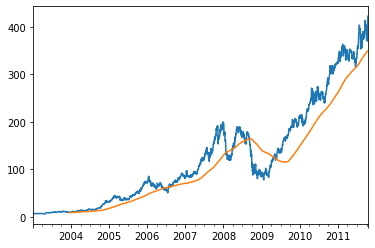

In [158]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot() # .rolling(window)

`rolling(250)` creates an object that enables grouping over a 250-day sliding window.

The plot shows a 250-day moving window average of Apple's stock price.

By default, rolling function requires non-NA values in window, but can be changed.

In [159]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5: 12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

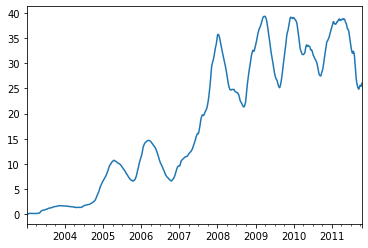

In [160]:
appl_std250.plot()

An expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series.

> Note: Calling a moving window function on a DataFrame applies the transformation to each column.

<AxesSubplot:>

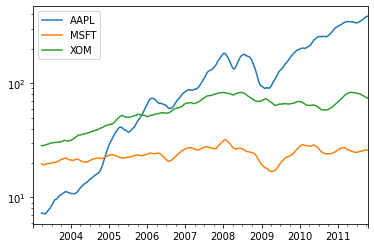

In [161]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

To compute a 20-day rolling mean with strings.

In [162]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 11.7.1 Exponentially Weighted Functions

An alternative to using a static window size with equally weighted observations is to specify a constant **decay factor** to give more weight to more recent observations.

Use `ewm` with `rolling` and `expanding`.

Here's an example comparing a 60-day moving average of Apple's stock price with an EW moving average with `span=60`.

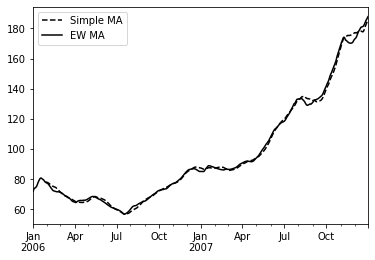

In [166]:
aapl_px = close_px.AAPL['2006': '2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### 11.7.2 Binary Moving Window Functions

Suppose you want to find a stock's correlation to a benchmark index like the S&P 500. First compute the percent change for all of our time series of interest.

In [167]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

The `corr` aggregation function after calling `rolling` computes the rolling correlation with `spx_rets`.

<AxesSubplot:>

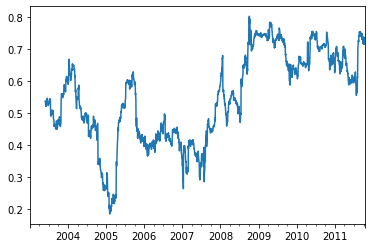

In [168]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once.

<AxesSubplot:>

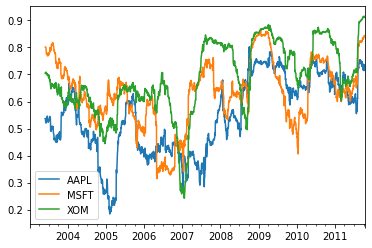

In [169]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 11.7.3 User-Defined Moving Window Functions

The `apply` method on `rolling` provides a means to apply an array function of your own devising over a moving window.

While we can compute sample quantiles using `rolling().quantile(q)`, we might be interested in the percentile rank of a particular value of the sample. We can use `scipy.stats.percentileofscore`.

In [171]:
from scipy.stats import percentileofscore

<AxesSubplot:>

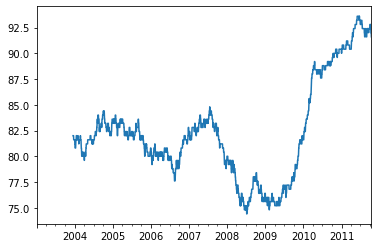

In [172]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

## 11.8 Conclusion